# Final Model

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

In [9]:
player_df = pd.read_csv('Data/fifa_players_data_for_models.csv')
player_df.drop('Unnamed: 0', axis=1, inplace=True)
player_df

,overall,potential,age,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,attacking_crossing,attacking_finishing,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,93,93,34,170,72,4,4,5,85,95,...,75,96,20,35,24,6,11,15,14,8
1,92,92,32,185,81,4,4,5,71,95,...,90,88,35,42,19,15,6,12,8,10
2,91,91,36,187,83,4,5,5,87,95,...,88,95,24,32,24,7,11,15,14,11
3,91,91,29,175,68,5,5,5,85,83,...,93,93,35,32,29,9,9,15,15,11
4,91,91,30,181,70,5,4,4,94,82,...,83,89,68,65,53,15,13,5,10,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18999,48,60,18,168,58,3,2,1,40,52,...,46,47,15,24,23,7,14,6,8,15
19000,48,62,19,180,75,3,2,1,28,23,...,37,44,50,49,47,5,6,7,13,10
19001,48,65,19,180,72,2,1,1,12,5,...,16,23,9,12,13,52,49,49,43,48
19002,48,55,23,172,72,3,2,1,40,29,...,35,35,39,42,44,8,11,11,9,10


In [10]:
# Features
X = player_df.drop('overall', axis=1)
# Target
y = player_df['overall']

# Split the data into training and testing sets (test_size=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scaling
scale = RobustScaler()
X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)

# Fitting into Support Vector Regressor
svr = SVR(kernel='rbf')
svr.fit(X_train_scale, y_train)

# Train & Test predictions
svr_y_pred_train = svr.predict(X_train_scale)
svr_y_pred_test = svr.predict(X_test_scale)

# Cross Validation
cv = cross_val_score(svr, X_train, y_train, cv=5)
cv_score = cv.mean()

# Test results (R2 & RMSE)
svr_R2_training = r2_score(y_train, svr_y_pred_train)
svr_R2_testing = r2_score(y_test, svr_y_pred_test)

svr_rmse_training = mean_squared_error(y_train, svr_y_pred_train, squared=False)
svr_rmse_testing = mean_squared_error(y_test, svr_y_pred_test, squared=False)

print('SVR Cross Validation Score:', cv_score)
print('Support Vector Regression R2 - Testing:', svr_R2_testing)
print('Support Vector Regression RMSE - Testing:', svr_rmse_testing)



SVR Cross Validation Score: 0.9767211396609541
Support Vector Regression R2 - Testing: 0.9790370612443922
Support Vector Regression RMSE - Testing: 0.9858823683940229


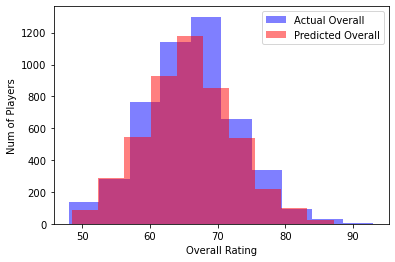

In [11]:
plt.hist(y_test, color='blue', label='Actual Overall', alpha=0.5)
plt.hist(svr_y_pred_test, color='red', label='Predicted Overall', alpha=0.5)
plt.xlabel('Overall Rating')
plt.ylabel('Num of Players')
plt.legend()
plt.show()

## Evaluating the model

In [49]:
# Sample test results vs actual overall

sample_data = X_test.iloc[:20]
sample_actual = y_test.iloc[:20]

scaler = RobustScaler()
sample_data_scale = scaler.fit_transform(sample_data)

pred = np.round(svr.predict(sample_data_scale), 2)
act = list(sample_actual)
columns = ['Actual_Overall', 'Prediction']
sample_result = pd.DataFrame([[x, y] for x, y in zip(act, pred)], columns=columns)
sample_result['Variance'] = sample_result['Actual_Overall'] - sample_result['Prediction']
sample_result


,Actual_Overall,Prediction,Variance
0,75,75.61,-0.61
1,63,62.58,0.42
2,73,74.69,-1.69
3,73,76.31,-3.31
4,65,67.63,-2.63
5,63,67.14,-4.14
6,67,70.36,-3.36
7,60,60.12,-0.12
8,52,53.82,-1.82
9,66,66.83,-0.83


In [70]:
sample_data

,potential,age,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,attacking_crossing,attacking_finishing,attacking_heading_accuracy,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
1911,83,20,176,71,4,3,1,63,70,54,...,42,72,74,79,70,15,6,10,6,13
13144,71,22,180,69,3,2,1,59,60,55,...,64,55,23,22,17,11,7,13,14,8
2929,80,23,188,74,3,4,1,63,63,55,...,57,74,67,69,69,15,9,11,14,10
2968,81,21,181,74,3,4,1,77,59,49,...,61,62,49,61,55,9,14,11,8,15
10407,72,24,175,66,3,2,1,54,35,53,...,40,52,64,67,60,6,13,15,9,12
12439,63,26,188,77,3,1,1,14,13,12,...,20,43,19,16,16,62,65,59,63,63
7752,70,26,183,73,3,2,1,54,56,64,...,51,66,65,67,67,8,9,10,7,9
15659,68,22,181,72,3,3,1,61,58,47,...,63,50,27,33,30,8,11,13,8,5
18606,62,22,177,61,3,2,1,38,30,45,...,48,47,41,48,47,9,7,9,7,5
8797,66,29,177,73,3,2,1,63,42,55,...,42,57,66,69,66,13,11,13,11,16


In [71]:
df = pd.read_csv("Data/fifa_players_22_cleaned.csv")
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,name,player_positions,best_position,overall,potential,value_eur,wage_eur,age,dob,height_cm,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,L. Messi,"RW, ST, CF",RW,93,93,78000000.0,320000.0,34,1987-06-24,170,...,96,20,35,24,6,11,15,14,8,NaN
1,R. Lewandowski,ST,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,...,88,35,42,19,15,6,12,8,10,NaN
2,Cristiano Ronaldo,"ST, LW",ST,91,91,45000000.0,270000.0,36,1985-02-05,187,...,95,24,32,24,7,11,15,14,11,NaN
3,Neymar Jr,"LW, CAM",LW,91,91,129000000.0,270000.0,29,1992-02-05,175,...,93,35,32,29,9,9,15,15,11,NaN
4,K. De Bruyne,"CM, CAM",CM,91,91,125500000.0,350000.0,30,1991-06-28,181,...,89,68,65,53,15,13,5,10,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18999,R. Mahon,"LW, LM",ST,48,60,110000.0,500.0,18,2003-06-06,168,...,47,15,24,23,7,14,6,8,15,NaN
19000,S. Black,CB,CB,48,62,100000.0,500.0,19,2002-03-01,180,...,44,50,49,47,5,6,7,13,10,NaN
19001,H. Wiles-Richards,GK,GK,48,65,110000.0,1000.0,19,2002-05-27,180,...,23,9,12,13,52,49,49,43,48,33.0
19002,J. Affonso,CM,CAM,48,55,90000.0,500.0,23,1998-06-09,172,...,35,39,42,44,8,11,11,9,10,NaN


In [75]:
# Getting the player names from the original data
sample_data_w_name = sample_data.join(df['name'])
first_column = sample_data_w_name.pop('name')
sample_data_w_name.insert(0, 'name', first_column)
sample_data_w_name.reset_index(drop=True)


,name,potential,age,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,attacking_crossing,attacking_finishing,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,Unai Vencedor,83,20,176,71,4,3,1,63,70,...,42,72,74,79,70,15,6,10,6,13
1,J. Giani,71,22,180,69,3,2,1,59,60,...,64,55,23,22,17,11,7,13,14,8
2,O. Ejaria,80,23,188,74,3,4,1,63,63,...,57,74,67,69,69,15,9,11,14,10
3,M. Cuisance,81,21,181,74,3,4,1,77,59,...,61,62,49,61,55,9,14,11,8,15
4,A. Al Khaibari,72,24,175,66,3,2,1,54,35,...,40,52,64,67,60,6,13,15,9,12
5,L. Andrenacci,63,26,188,77,3,1,1,14,13,...,20,43,19,16,16,62,65,59,63,63
6,V. Vevatne,70,26,183,73,3,2,1,54,56,...,51,66,65,67,67,8,9,10,7,9
7,L. Ambrogio,68,22,181,72,3,3,1,61,58,...,63,50,27,33,30,8,11,13,8,5
8,U. Mathisen,62,22,177,61,3,2,1,38,30,...,48,47,41,48,47,9,7,9,7,5
9,D. Schmidt,66,29,177,73,3,2,1,63,42,...,42,57,66,69,66,13,11,13,11,16


In [80]:
# Sample test results with player's name
sample_result_w_name = (sample_data_w_name['name'].reset_index()).join(sample_result)
sample_result_w_name

,index,name,Actual_Overall,Prediction,Variance
0,1911,Unai Vencedor,75,75.61,-0.61
1,13144,J. Giani,63,62.58,0.42
2,2929,O. Ejaria,73,74.69,-1.69
3,2968,M. Cuisance,73,76.31,-3.31
4,10407,A. Al Khaibari,65,67.63,-2.63
5,12439,L. Andrenacci,63,67.14,-4.14
6,7752,V. Vevatne,67,70.36,-3.36
7,15659,L. Ambrogio,60,60.12,-0.12
8,18606,U. Mathisen,52,53.82,-1.82
9,8797,D. Schmidt,66,66.83,-0.83
